# Table Generation for MRAM Benchmark

Always use the 32 MiB option.

Columns:
+ UPMEM (8)
+ UPMEM (1)
+ Memclave (16)
+ Memclave (8)
+ Memclave (1)

Rows:
+ Scatter
+ Gather
+ Broadcast

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_baseline = pd.read_csv("data/mram-upmem.csv")
data_memclave = pd.read_csv("data/mram.csv")

data_baseline["arch"] = "upmem"
data_memclave["arch"] = "memclave"

data = pd.concat([data_baseline, data_memclave])

In [2]:
data = data[data["size"] == 32 << 20]
data_tf = data[data["type"] == "transfer"]
data_bc = data[data["type"] == "broadcast"]
data_gt = data[data["type"] == "gather"]
data_row = [data_bc, data_tf, data_gt]
rows = ["Broadcast", "Transfer", "Gather  "]

print("\t\t\tUPMEM_8  UPMEM_1  MC_16    MC_8      MC_1")

for row, name in zip(data_row, rows):
    upmem = row[row["arch"] == "upmem"]
    upmem_8 = upmem[upmem["threads"] == 8]
    upmem_1 = upmem[upmem["threads"] == 1]
    memclave = row[row["arch"] == "memclave"]
    memclave_16 = memclave[memclave["threads"] == 12]
    memclave_8 = memclave[memclave["threads"] == 8]
    memclave_1 = memclave[memclave["threads"] == 1]

    field = "transfer rate (MB/s)"

    res = [
        upmem_8[field].mean(),
        upmem_1[field].mean(),
        memclave_16[field].mean(),
        memclave_8[field].mean(),
        memclave_1[field].mean()
    ]

    print("{}\t & {:>8.2f} & {:>8.2f} & {:>8.2f} & {:>8.2f} & {:>8.2f} \\\\".format(
        name,
        res[0],
        res[1],
        res[2],
        res[3],
        res[4]
    ))




			UPMEM_8  UPMEM_1  MC_16    MC_8      MC_1
Broadcast	 &  8197.51 &  8196.35 & 13160.70 & 13919.08 &  6827.78 \\
Transfer	 &  4326.71 &  4344.01 &  4882.36 &  4577.73 &   687.74 \\
Gather  	 &  2301.45 &  2296.85 &   794.53 &   584.51 &   250.26 \\


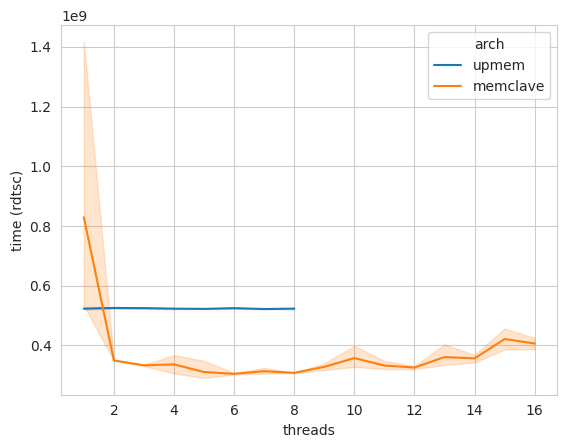

In [4]:
fig, ax = plt.subplots()
sns.lineplot(data[data["type"] == "broadcast"], x = "threads", y = "time (rdtsc)", hue = "arch")
plt.show()